### Note

In this notebook, we calculate the number of people obtaining PhD, and the number of people migrating in and out of a country, by year. Although Google said there are 190+ countries in the world, there are 248 unique countries as shown in the ORCID dataset. Our analysis is limited to the last 10 years ([2010, 2019]), which is considered as contemporary, to eliminate data bias (senior researchers may not be in ORCID lacking technological adoption). 

### References

Plot multiple dataframe in the same figure

In [1]:
import csv
import json, os, sys
import pandas as pd

START_YEAR=2005
END_YEAR=2015

df=pd.read_csv("../csv/dw_aff.csv",delimiter=",")
print(df.head())

# df = pd.DataFrame(data, columns=[
#     'orcid_id',
#     'record_type',
#     'country',
#     'region',
#     'city',
#     'org_name',
#     'org_id',
#     'start_year',
#     'start_month',
#     'start_day',
#     'end_year',
#     'end_month',
#     'end_day',
#     'dep',
#     'role',
#     'gmt_create',
#     'gmt_modified',
#     ])




/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   row_id             orcid_id record_type country                region  \
0       1  0000-0001-5015-5009   EDUCATION      IT               Liguria   
1       2  0000-0001-5015-5009   EDUCATION      IT               Liguria   
2       3  0000-0001-5016-3009   EDUCATION      FR                   NaN   
3       4  0000-0001-5016-3009   EDUCATION      GB  Central Bedfordshire   
4       5  0000-0001-5016-3009   EDUCATION      FR                   NaN   

        city                        org_name       org_id  start_year  \
0      Genoa             University of Genoa  grid.5606.5      2016.0   
1      Genoa             University of Genoa  grid.5606.5      2013.0   
2      Paris                             NaN        27068      2004.0   
3  Cranfield            Cranfield University         2717      2001.0   
4      Cergy  Ecole de Biologie Industrielle       206418      1998.0   

   start_month  ...  end_day  dep                                   title  \
0          9.0  ...     28.

In [2]:
# Total country codes in set
country_set=set(list(df['country'].values))
print(country_set)
print(len(country_set))

{nan, 'CL', 'KE', 'HT', 'WS', 'GQ', 'BY', 'CU', 'DJ', 'GI', 'BA', 'CF', 'QA', 'LK', 'LI', 'SA', 'BE', 'TL', 'NG', 'AL', 'TG', 'RO', 'MS', 'MA', 'AQ', 'CO', 'PR', 'TD', 'MF', 'PW', 'SB', 'NL', 'KM', 'GS', 'PT', 'MK', 'KW', 'BL', 'UM', 'GD', 'TW', 'TR', 'CC', 'SG', 'DE', 'GY', 'AI', 'BO', 'SJ', 'RE', 'SK', 'DM', 'ES', 'BR', 'PG', 'NR', 'GF', 'MQ', 'TH', 'MT', 'FO', 'AU', 'SR', 'IL', 'KG', 'BT', 'TC', 'KI', 'KZ', 'PA', 'SL', 'VU', 'EH', 'HK', 'BN', 'PE', 'ZW', 'BM', 'PF', 'NF', 'TV', 'MH', 'LY', 'AM', 'JE', 'TZ', 'HM', 'IT', 'CN', 'MN', 'BF', 'LS', 'CG', 'PS', 'TF', 'VN', 'VI', 'IM', 'WF', 'IE', 'UZ', 'SC', 'GB', 'NE', 'CI', 'AW', 'SO', 'CA', 'ME', 'FJ', 'KN', 'OM', 'CX', 'NI', 'GA', 'UY', 'UA', 'AG', 'NO', 'GW', 'NZ', 'ML', 'GR', 'ER', 'BG', 'NP', 'LR', 'TO', 'VE', 'KY', 'CK', 'AF', 'HN', 'NU', 'AS', 'MU', 'FI', 'DZ', 'EC', 'CV', 'IS', 'SI', 'GP', 'IO', 'SV', 'HR', 'RU', 'MM', 'CH', 'PY', 'MD', 'YT', 'AR', 'SX', 'MR', 'BH', 'PK', 'CD', 'UG', 'RS', 'JO', 'BB', 'CZ', 'TN', 'AE', 'LT', 'GL'

Below we choose italy as an example to analyze. 

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set()
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

In [6]:
def get_phd_obtained_country(df,current_country="IT"):
    '''
    Return x = year series, y = count per year'''
    df_sub=df[df.country==current_country]
#     print(df_sub)
    
    phd_graduation_records=df_sub[df_sub.record_type=="EDUCATION"].dropna(subset=["end_year"])
    phd_graduation_records=phd_graduation_records.loc[np.logical_and(phd_graduation_records.end_year>=START_YEAR,phd_graduation_records.end_year<=END_YEAR)]
    phd_graduation_count_per_year=phd_graduation_records.groupby(["end_year"])['orcid_id'].count()
    phd_graduation_count_per_year=pd.DataFrame(phd_graduation_count_per_year).reset_index()
    # print(phd_graduation_count_per_year.index,phd_graduation_count_per_year.orcid_id)
    # ax=phd_graduation_count_per_year.plot(x="end_year", kind='bar')
#     plt.plot(phd_graduation_count_per_year['end_year'],phd_graduation_count_per_year['orcid_id'],label="finish_at_this_year")

    return list(phd_graduation_count_per_year['end_year']),list(phd_graduation_count_per_year['orcid_id'])


# print(get_phd_obtained_country(df))

(0     2005.0
1     2006.0
2     2007.0
3     2008.0
4     2009.0
5     2010.0
6     2011.0
7     2012.0
8     2013.0
9     2014.0
10    2015.0
Name: end_year, dtype: float64, 0     2432
1     2551
2     2719
3     2992
4     3192
5     3326
6     3629
7     3883
8     3987
9     4094
10    3944
Name: orcid_id, dtype: int64)


In [48]:
df_migration_records=pd.read_csv("../csv/dw_aff_emp_mig.csv",delimiter=",")
df_migration_records=df_migration_records[df_migration_records.current_aff_country!=df_migration_records.prev_aff_country]
print(df_migration_records.columns)
# migrating_out_per_country(df_migration_records)

Index(['orcid_id', 'current_aff_row_id', 'current_aff_country',
       'current_aff_region', 'current_aff_city', 'current_aff_start_year',
       'current_aff_start_month', 'current_aff_start_day',
       'current_aff_start_datestr', 'current_aff_end_year',
       'current_aff_end_month', 'current_aff_end_day',
       'current_aff_end_datestr', 'current_aff_org_name', 'current_aff_dep',
       'current_aff_title', 'prev_aff_row_id', 'prev_aff_country',
       'prev_aff_region', 'prev_aff_city', 'prev_aff_start_year',
       'prev_aff_start_month', 'prev_aff_start_day', 'prev_aff_start_datestr',
       'prev_aff_end_year', 'prev_aff_end_month', 'prev_aff_end_day',
       'prev_aff_end_datestr', 'prev_aff_org_name', 'prev_aff_dep',
       'prev_aff_title', 'migration_gap_scale', 'prev_stay_scale',
       'migration_gap', 'prev_stay'],
      dtype='object')


#### Next 

Calculate the proportion of migrating out vs. total obtained PhD at that year, the ratio. 

To do this, we import the table `dw_aff_emp_mig.csv` to calculate the number of people moving in and out of a particular country during one year. 

In [51]:
def migrating_out_per_country(df_migration_records,current_country="IT"):
    df_migration_records_sub=df_migration_records[df_migration_records.prev_aff_country==current_country].loc[np.logical_and(df_migration_records.prev_aff_end_year>=START_YEAR,df_migration_records.prev_aff_end_year<=END_YEAR)]
    df_migration_record_count_per_year=df_migration_records_sub.groupby(["prev_aff_end_year"])['orcid_id'].count()
    df_migration_record_count_per_year=pd.DataFrame(df_migration_record_count_per_year)
    df_migration_record_count_per_year=df_migration_record_count_per_year.reset_index()
#     print(df_migration_record_count_per_year)

    return list(df_migration_record_count_per_year['prev_aff_end_year']),list(df_migration_record_count_per_year['orcid_id'])
  



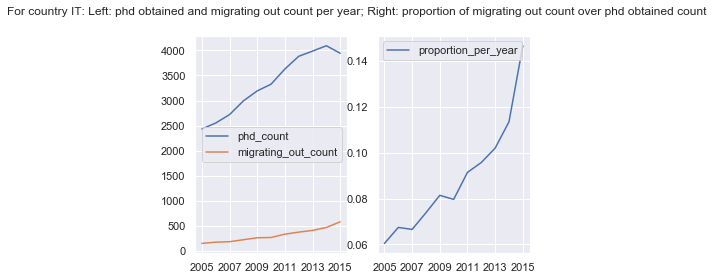

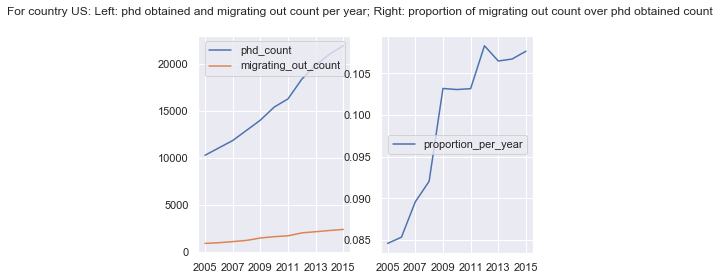

In [52]:
def plot_proportion(df,df_migration_records,current_country="IT"):

    year_x,phd_count_per_year=get_phd_obtained_country(df,current_country=current_country)
    if len(year_x)!=len(phd_count_per_year):
        return
    year_x_new,migrating_out_per_year=migrating_out_per_country(df_migration_records,current_country=current_country)
    if len(year_x_new)!=len(migrating_out_per_year):
        return
    if len(year_x_new)!=len(year_x) or not all([year_x_new[i]==year_x[i] for i in range(len(year_x_new))]):
        return
    proportion_per_year=[migrating_out_per_year[i]*1.0/phd_count_per_year[i] for i in range(len(phd_count_per_year))]

    fig, axs = plt.subplots(1, 2)
    fig.suptitle('For country '+str(current_country)+': Left: phd obtained and migrating out count per year; Right: proportion of migrating out count over phd obtained count')
    axs[0].plot(year_x, phd_count_per_year,label="phd_count")
    axs[0].plot(year_x, migrating_out_per_year,label="migrating_out_count")
    axs[1].plot(year_x,proportion_per_year,label="proportion_per_year")


    # plt.plot(year_x,phd_count_per_year,label="phd_count")
    # plt.plot(year_x,migrating_out_per_year,label="migrating_out_count")
    # plt.plot(year_x,proportion_per_year,label="proportion_per_year")
    axs[0].legend()
    axs[1].legend()
    axs[0].xaxis.set_ticks(np.arange(START_YEAR,END_YEAR+1,2))
    axs[1].xaxis.set_ticks(np.arange(START_YEAR,END_YEAR+1,2))
    plt.show()
    return


## Test two random countries, IT and US
plot_proportion(df,df_migration_records,current_country="IT")
plot_proportion(df,df_migration_records,current_country="US")
# # plt.show()
# phd_graduation_count_per_year.plot.bar()

# phd_graduation_count_per_year.plot(linestyle='-', marker='o')
# plt.show()

CL Chile


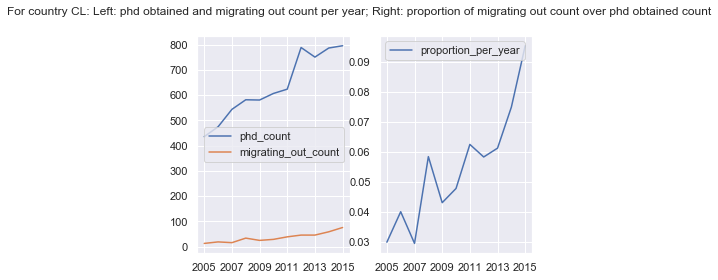


KE Kenya


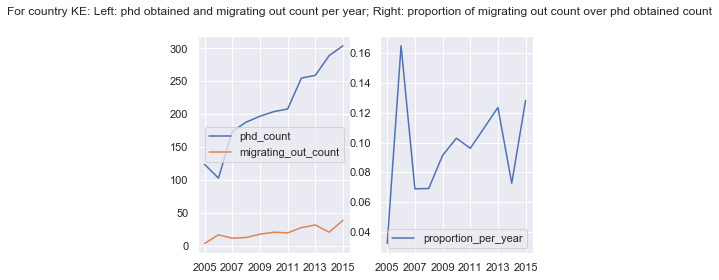


HT Haiti

WS Samoa

GQ Equatorial Guinea

BY Belarus


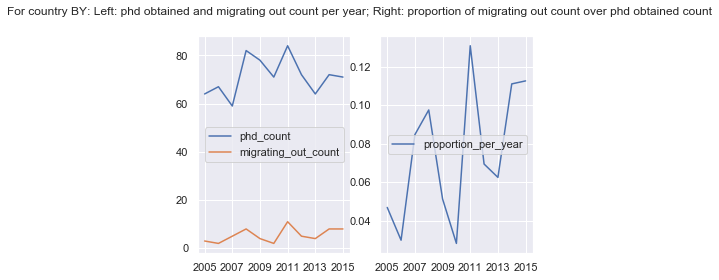


CU Cuba


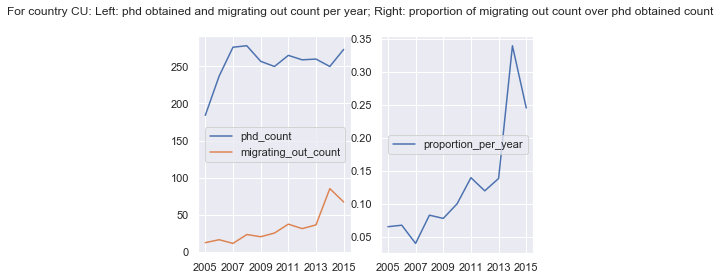


DJ Djibouti


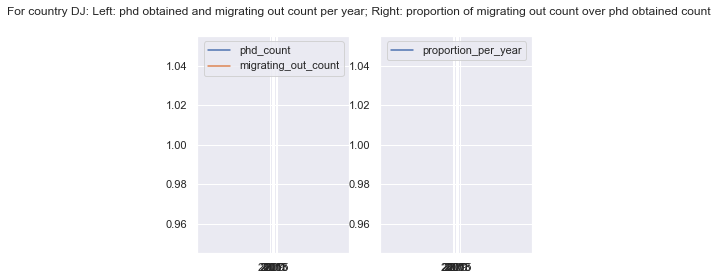


GI Gibraltar

BA Bosnia and Herzegovina

CF Central African Republic

QA Qatar

LK Sri Lanka


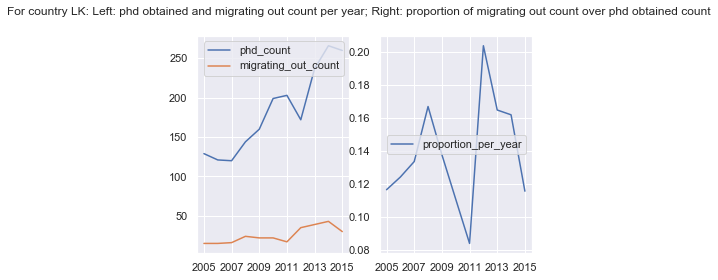


LI Liechtenstein

SA Saudi Arabia


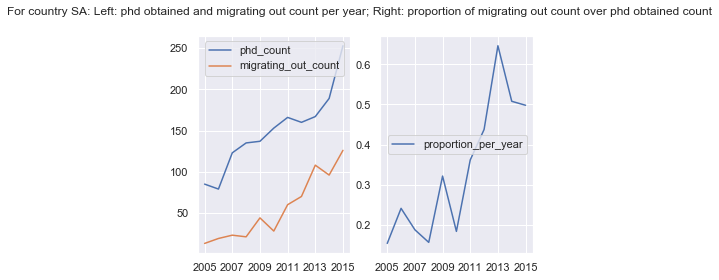


BE Belgium


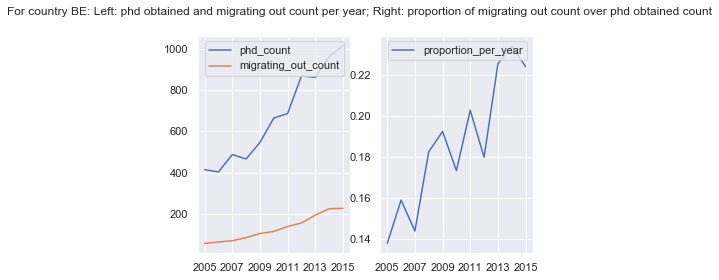


TL Timor-Leste

NG Nigeria


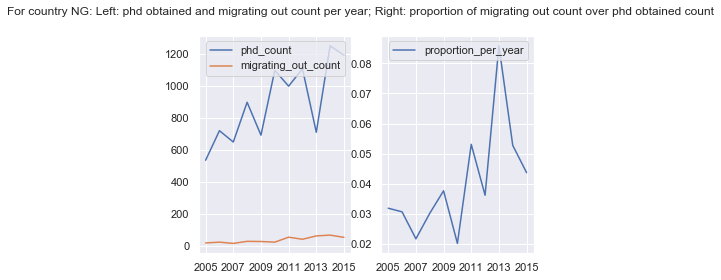


AL Albania

TG Togo

RO Romania


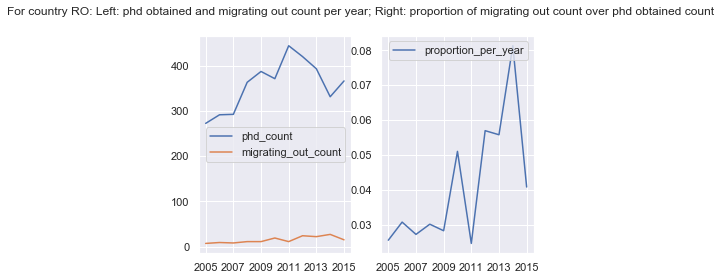


MS Montserrat

MA Morocco


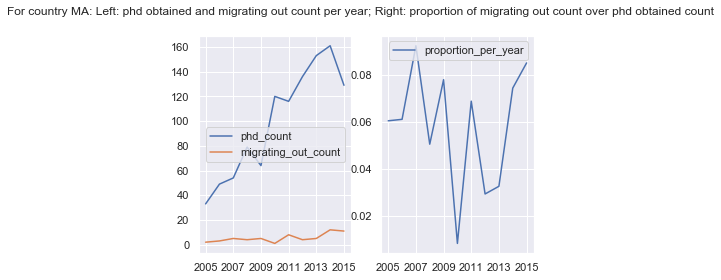


AQ Antarctica

CO Colombia


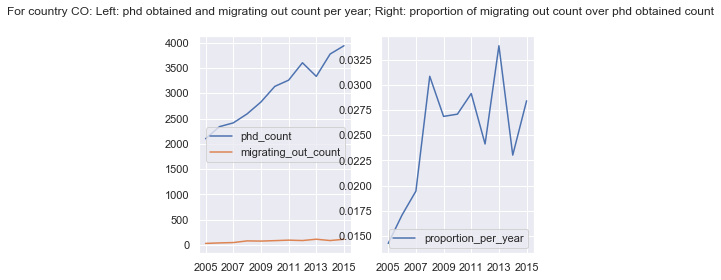


PR Puerto Rico


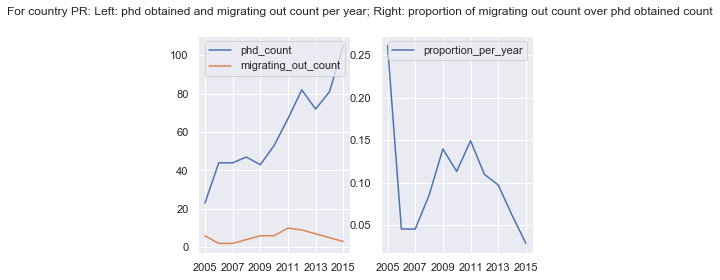


TD Chad

MF Saint Martin (French part)

PW Palau

SB Solomon Islands

NL Netherlands


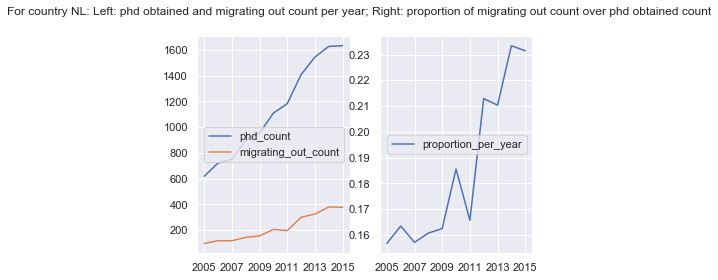


KM Comoros

GS South Georgia and the South Sandwich Islands


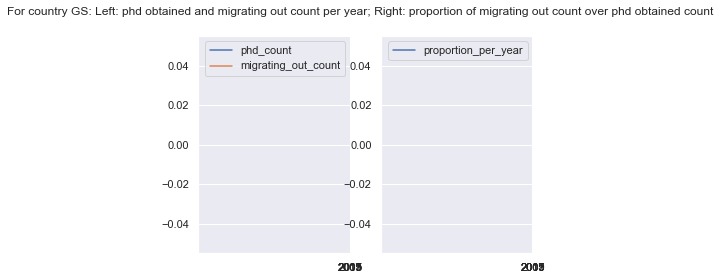


PT Portugal


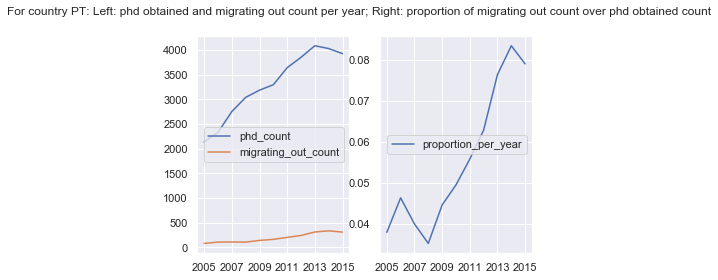


MK North Macedonia

KW Kuwait


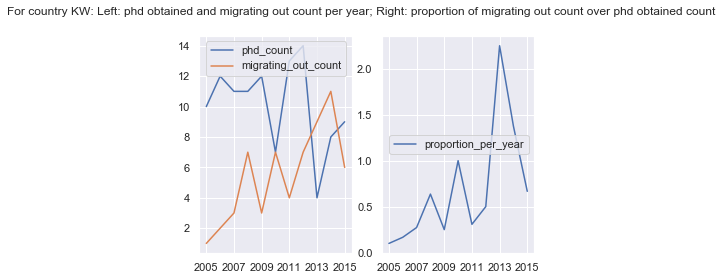


BL Saint Barthélemy


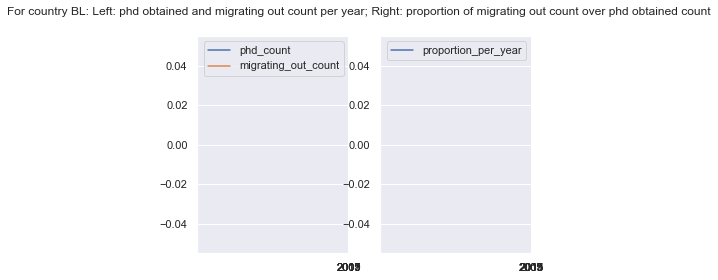


UM United States Minor Outlying Islands

GD Grenada

TW Taiwan, Province of China


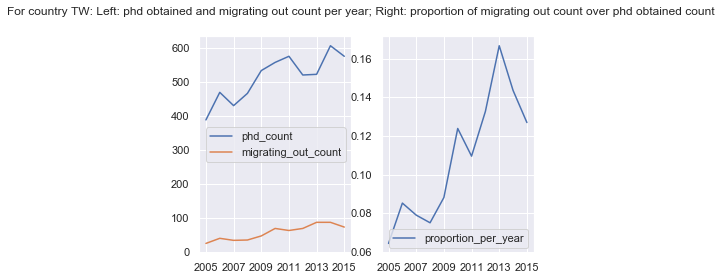


TR Turkey


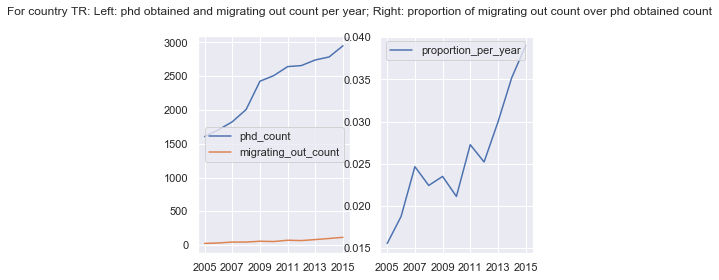


CC Cocos (Keeling) Islands


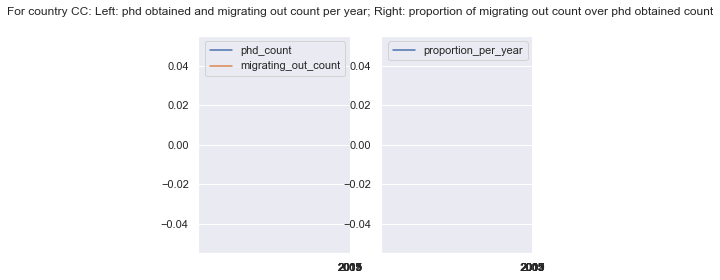


SG Singapore


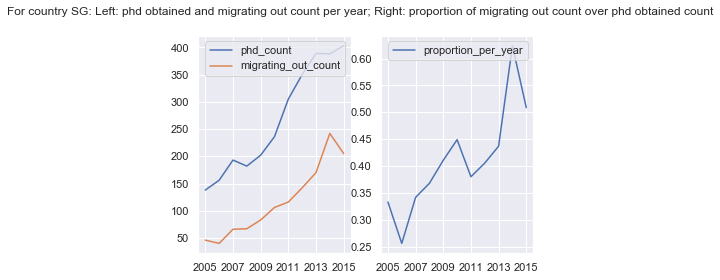


DE Germany


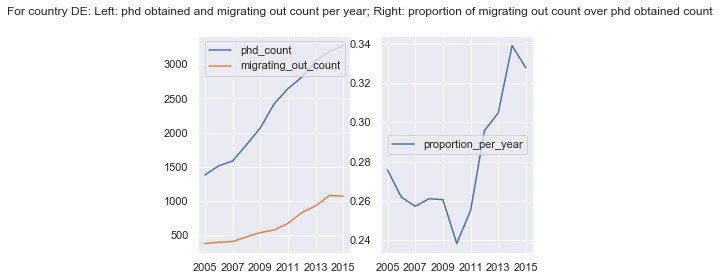


GY Guyana

AI Anguilla

BO Bolivia, Plurinational State of


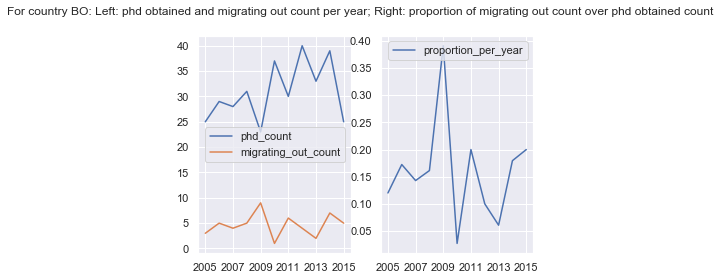


SJ Svalbard and Jan Mayen

RE Réunion

SK Slovakia


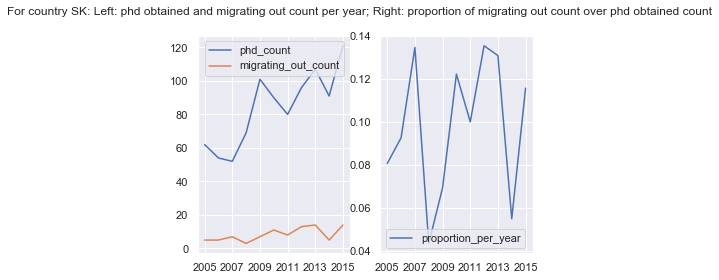


DM Dominica

ES Spain


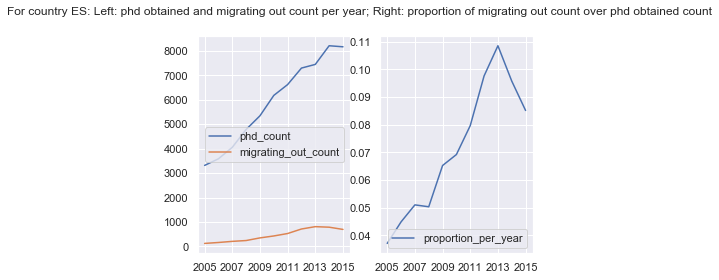


BR Brazil


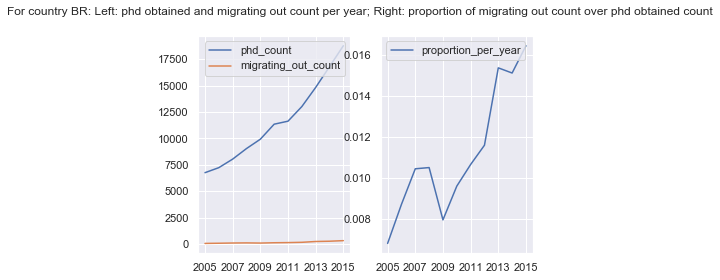


PG Papua New Guinea

NR Nauru

GF French Guiana

MQ Martinique

TH Thailand


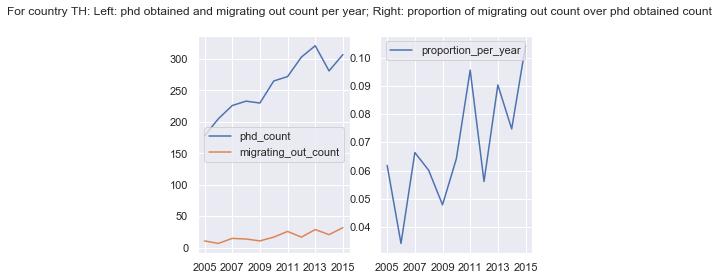


MT Malta

FO Faroe Islands

AU Australia


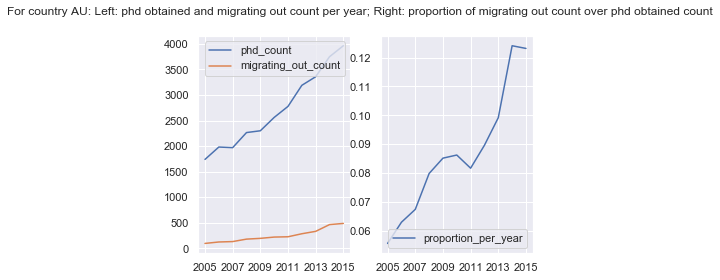


SR Suriname

IL Israel


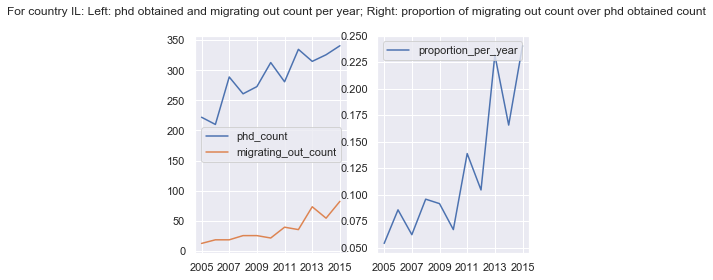


KG Kyrgyzstan

BT Bhutan

TC Turks and Caicos Islands

KI Kiribati

KZ Kazakhstan


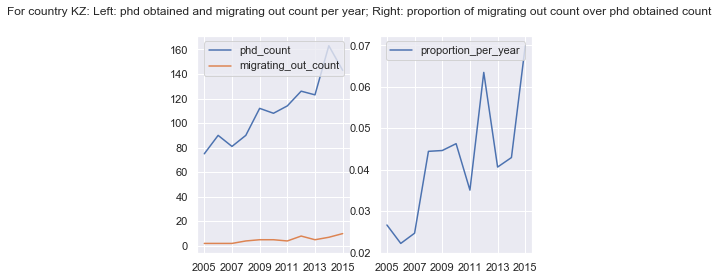


PA Panama

SL Sierra Leone

VU Vanuatu

EH Western Sahara

HK Hong Kong


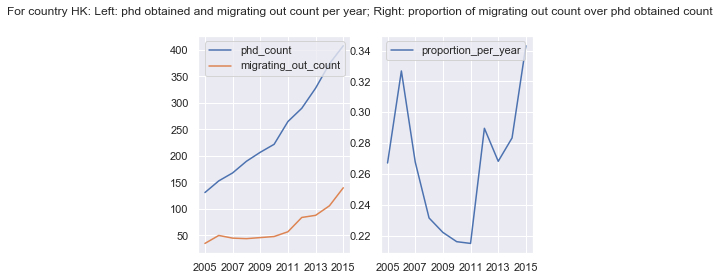


BN Brunei Darussalam

PE Peru


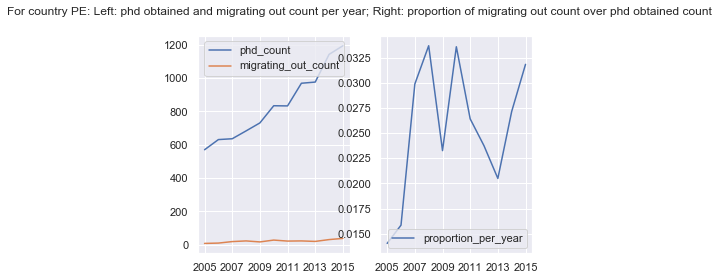


ZW Zimbabwe


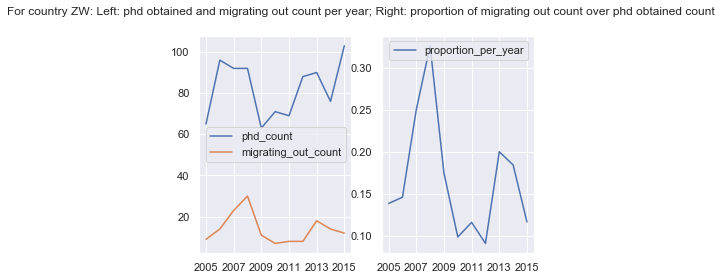


BM Bermuda

PF French Polynesia

NF Norfolk Island


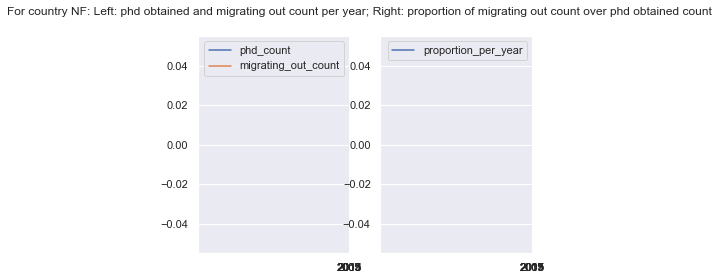


TV Tuvalu


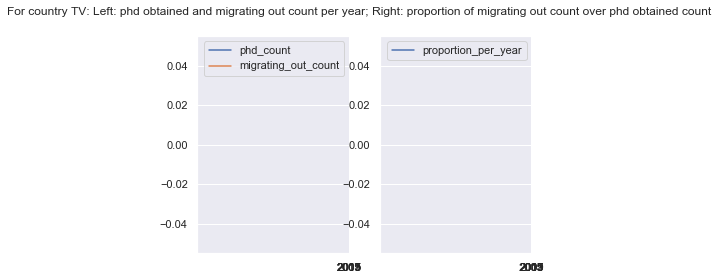


MH Marshall Islands

LY Libya


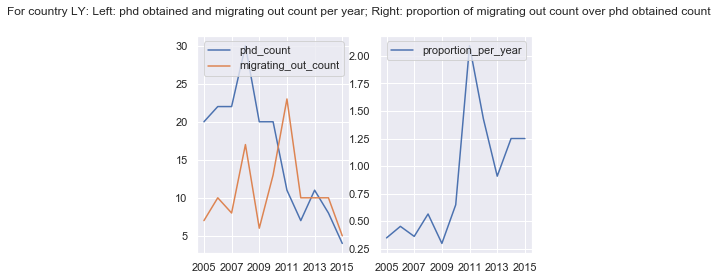


AM Armenia


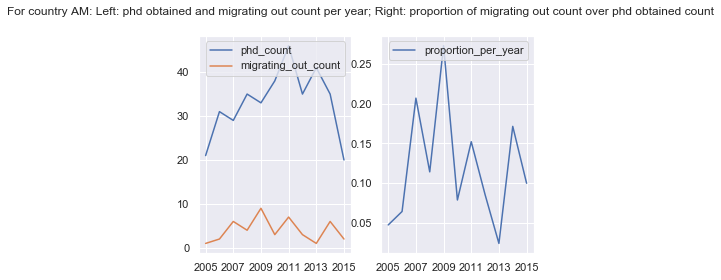


JE Jersey

TZ Tanzania, United Republic of


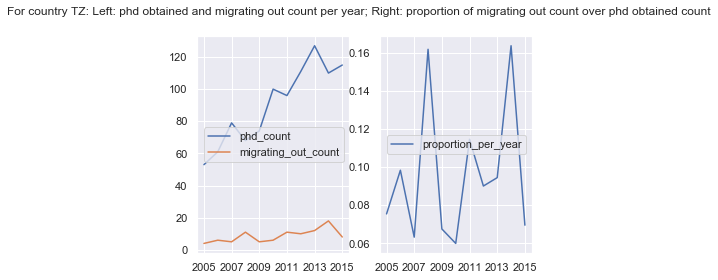


HM Heard Island and McDonald Islands


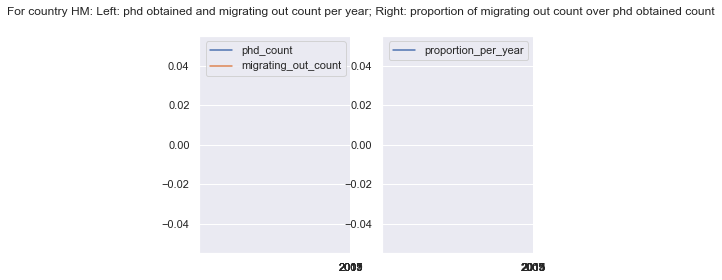


IT Italy


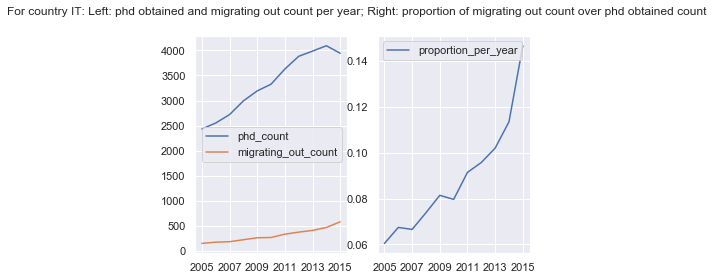


CN China


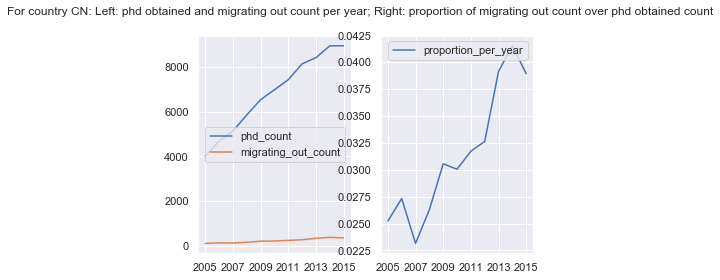


MN Mongolia


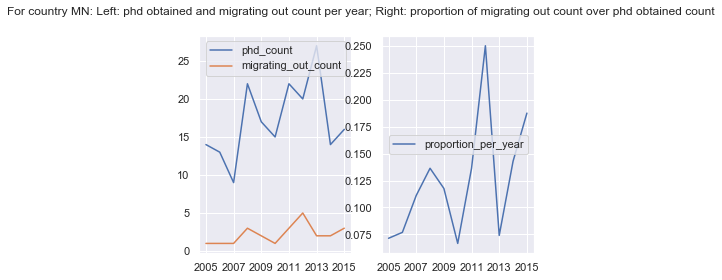


BF Burkina Faso

LS Lesotho

CG Congo

PS Palestine, State of


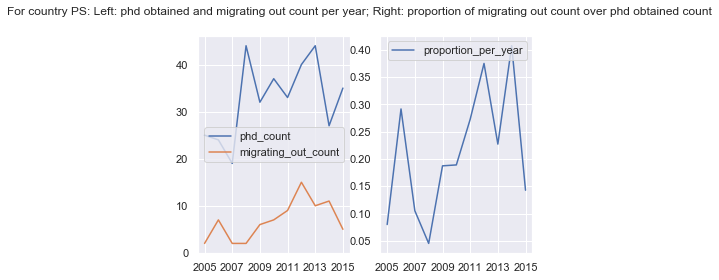


TF French Southern Territories

VN Viet Nam


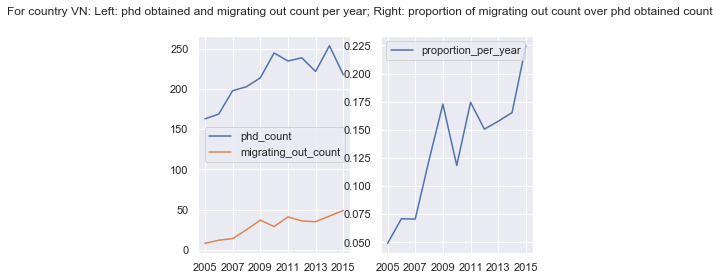


VI Virgin Islands, U.S.

IM Isle of Man

WF Wallis and Futuna


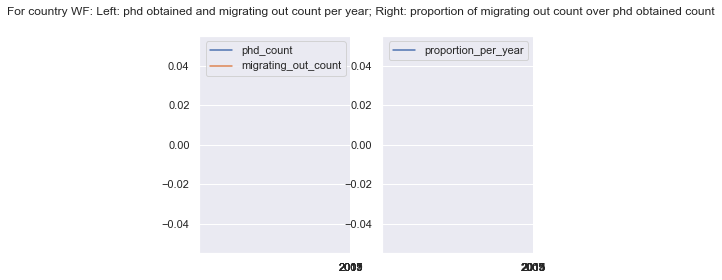


IE Ireland


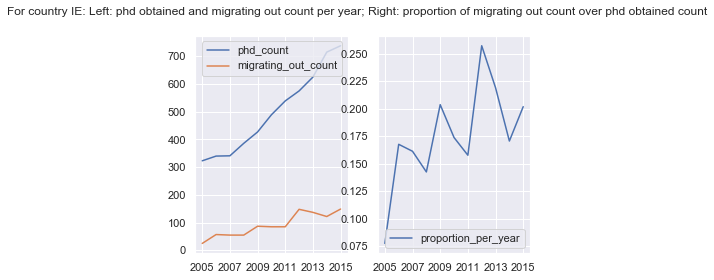


UZ Uzbekistan


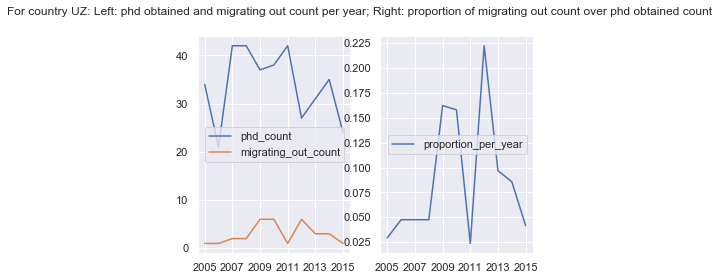


SC Seychelles

GB United Kingdom of Great Britain and Northern Ireland


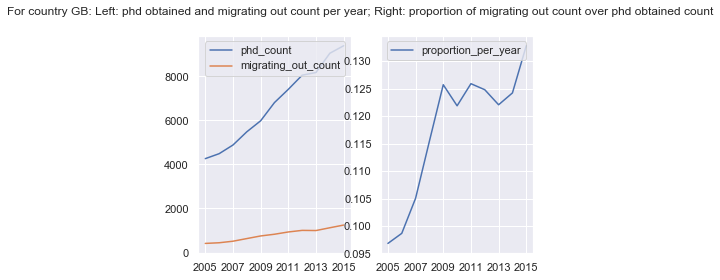


NE Niger

CI Côte d'Ivoire

AW Aruba

SO Somalia

CA Canada


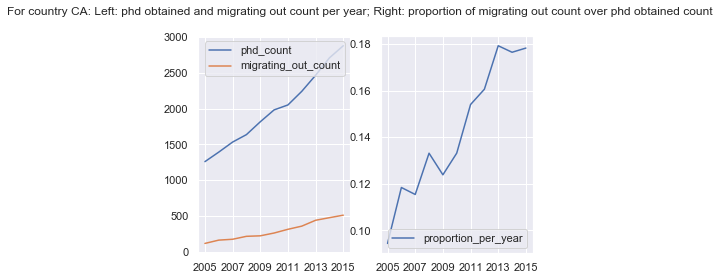


ME Montenegro

FJ Fiji


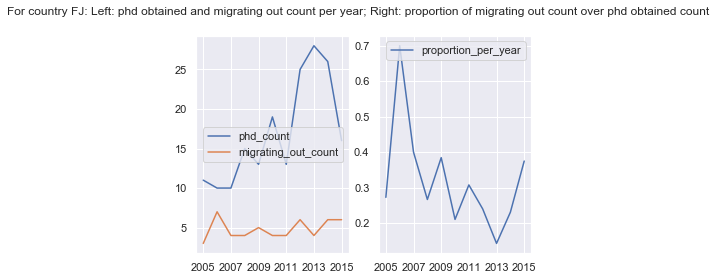


KN Saint Kitts and Nevis

OM Oman


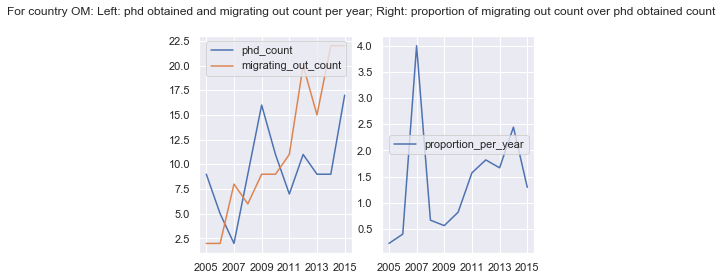


CX Christmas Island

NI Nicaragua


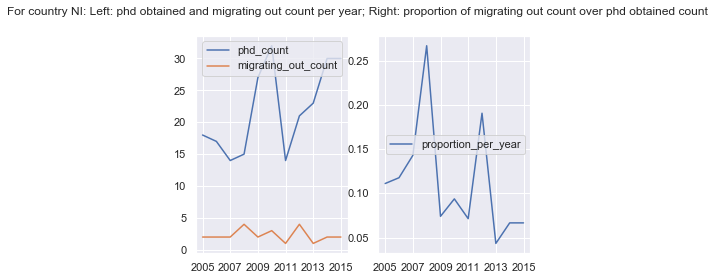


GA Gabon

UY Uruguay


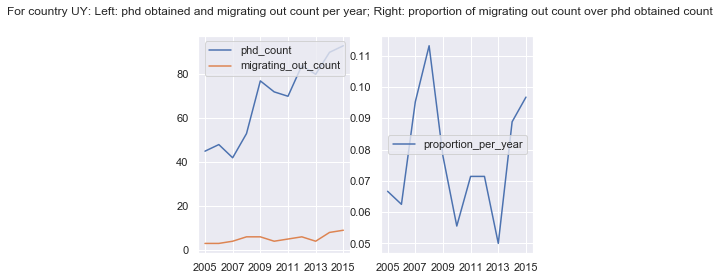


UA Ukraine


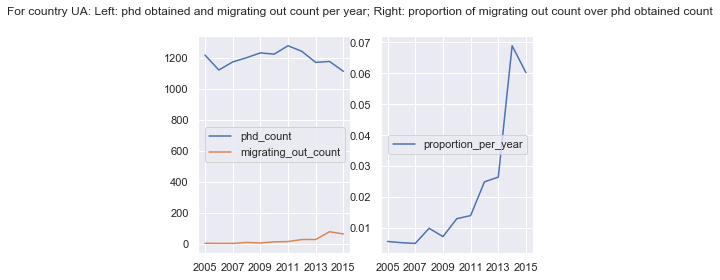


AG Antigua and Barbuda

NO Norway


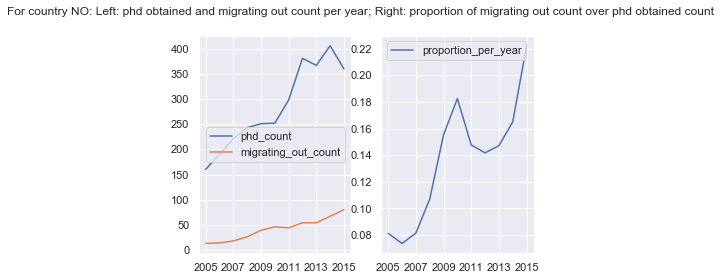


GW Guinea-Bissau

NZ New Zealand


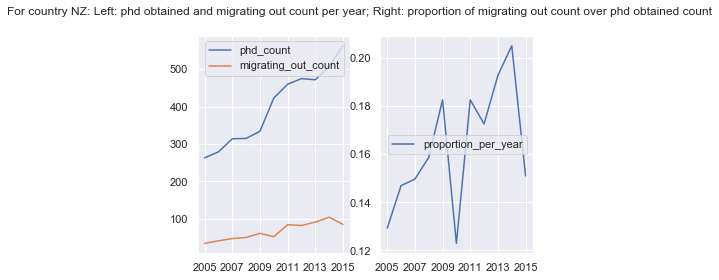


ML Mali

GR Greece


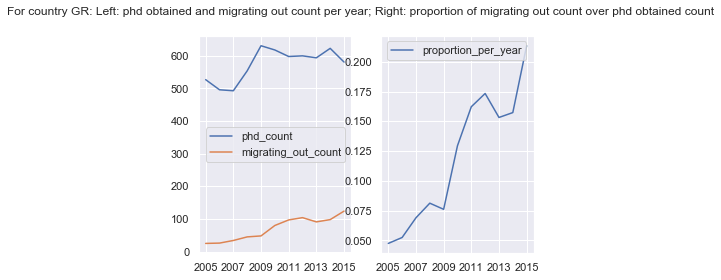


ER Eritrea

BG Bulgaria


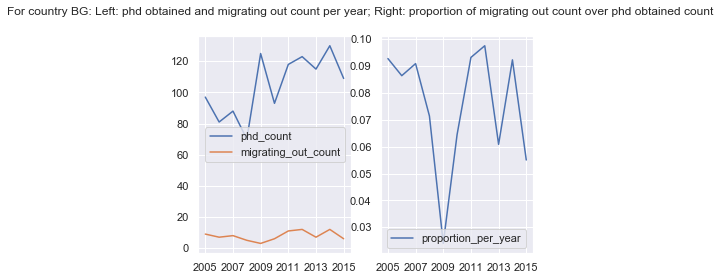


NP Nepal


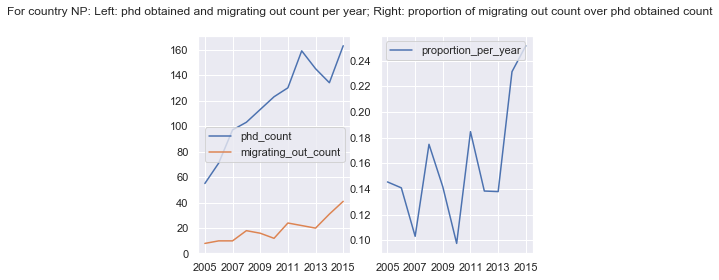


LR Liberia

TO Tonga

VE Venezuela, Bolivarian Republic of


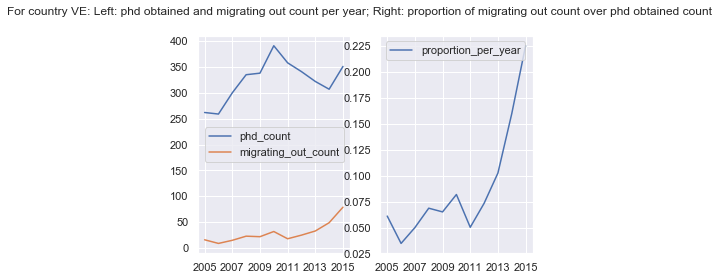


KY Cayman Islands

CK Cook Islands

AF Afghanistan


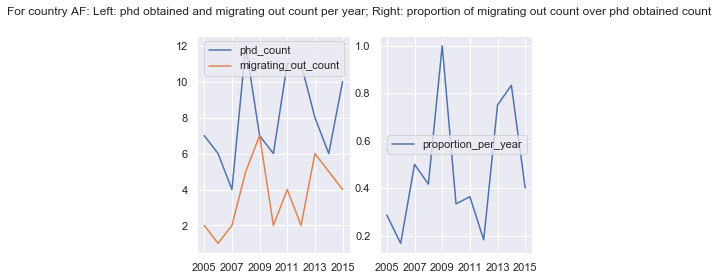


HN Honduras


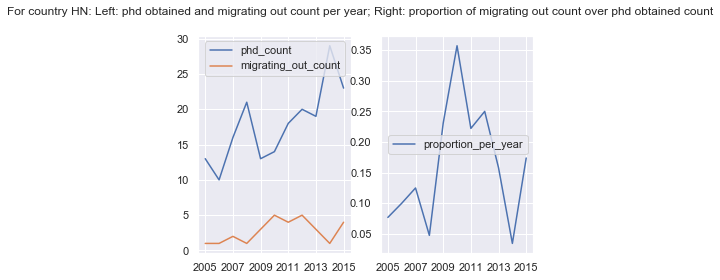


NU Niue


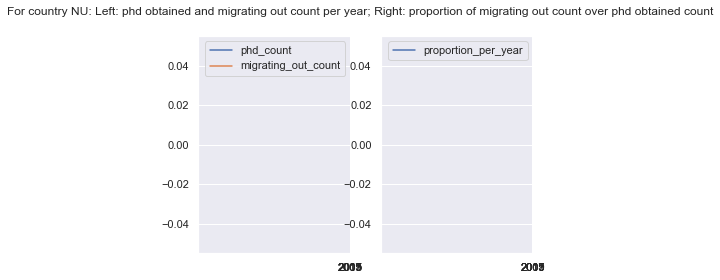


AS American Samoa

MU Mauritius

FI Finland


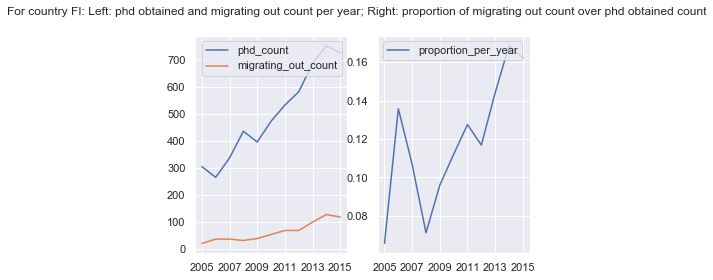


DZ Algeria


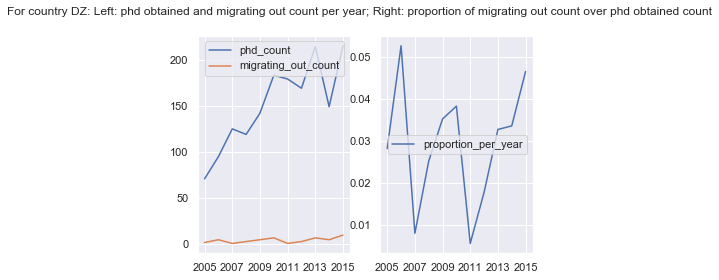


EC Ecuador


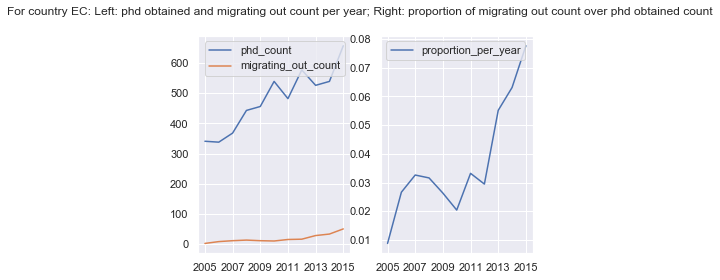


CV Cabo Verde

IS Iceland


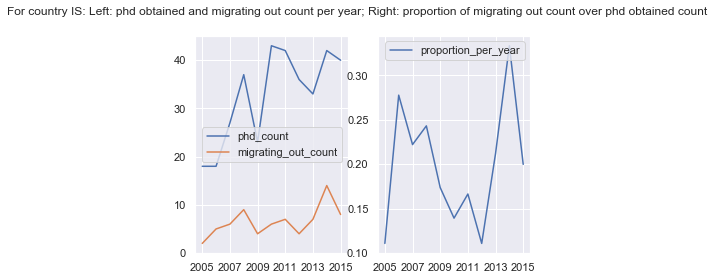


SI Slovenia


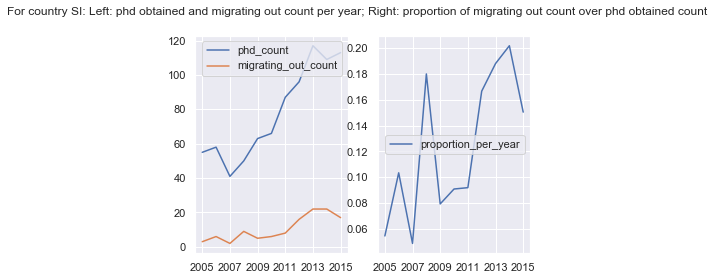


GP Guadeloupe

IO British Indian Ocean Territory

SV El Salvador

HR Croatia


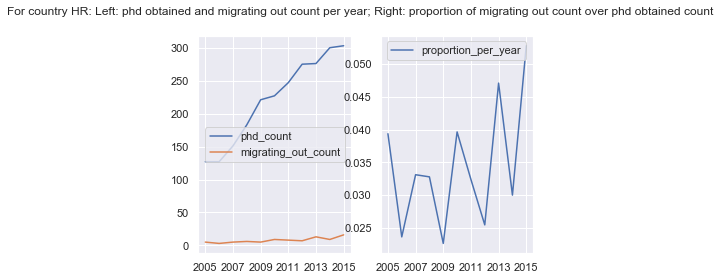


RU Russian Federation


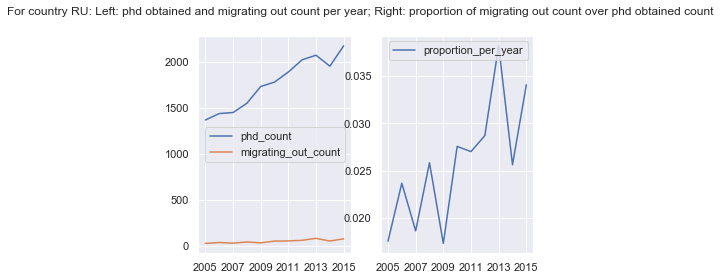


MM Myanmar

CH Switzerland


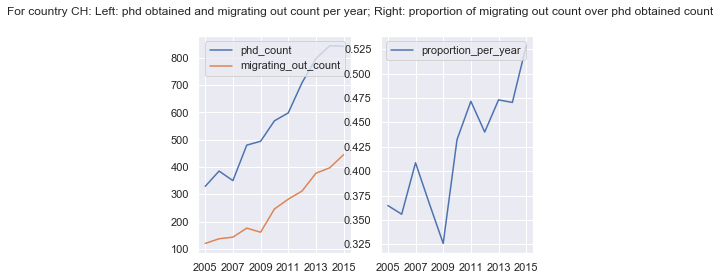


PY Paraguay

MD Moldova, Republic of

YT Mayotte

AR Argentina


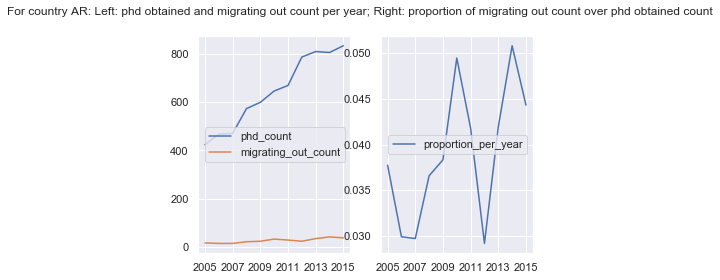


SX Sint Maarten (Dutch part)

MR Mauritania

BH Bahrain

PK Pakistan


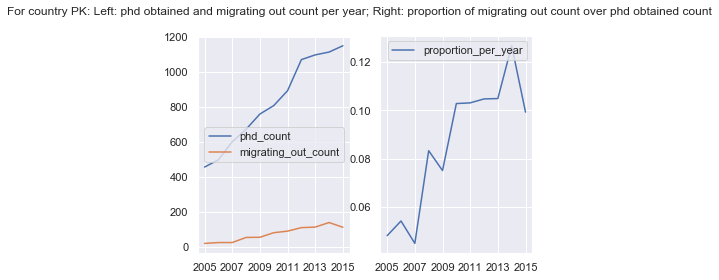


CD Congo, Democratic Republic of the

UG Uganda


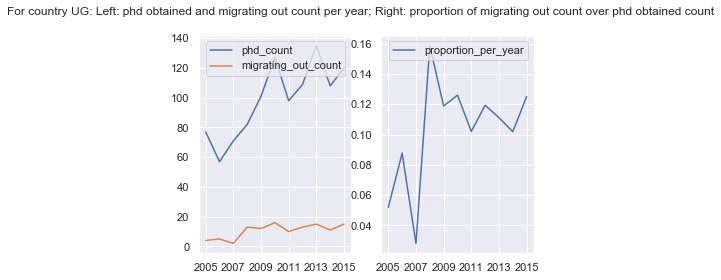


RS Serbia


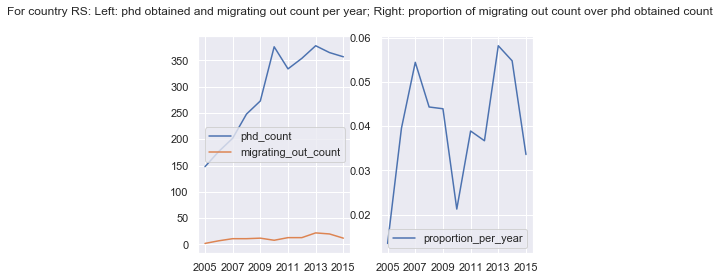


JO Jordan


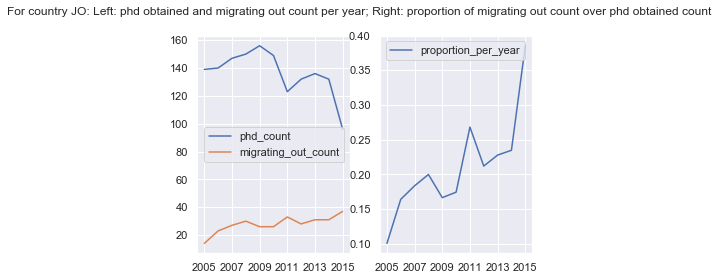


BB Barbados

CZ Czechia


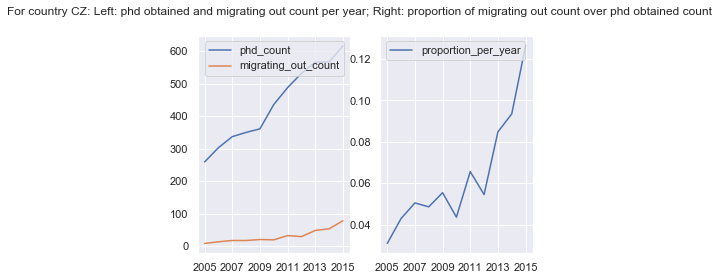


TN Tunisia


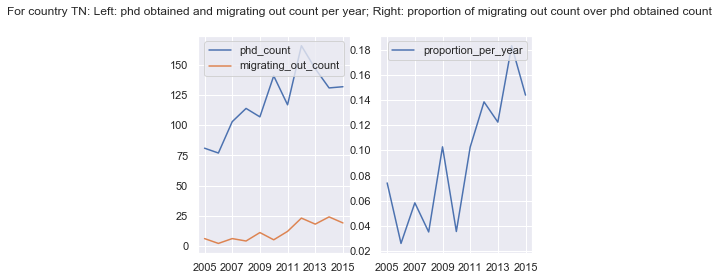


AE United Arab Emirates


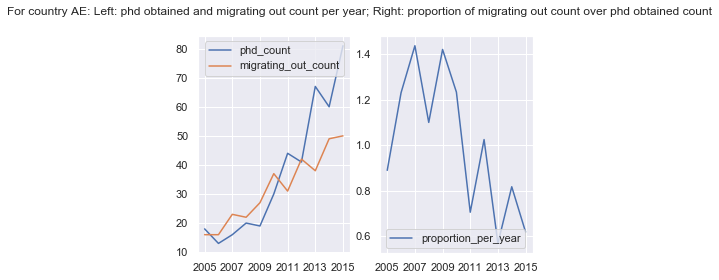


LT Lithuania

GL Greenland

TT Trinidad and Tobago

DO Dominican Republic

VG Virgin Islands, British


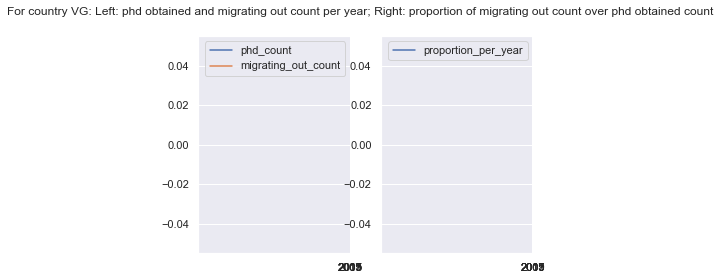


SN Senegal

NC New Caledonia

US United States of America


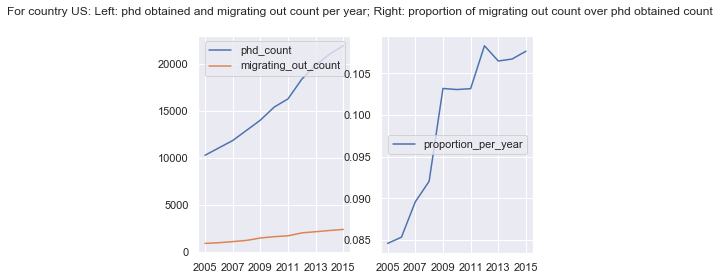


SY Syrian Arab Republic


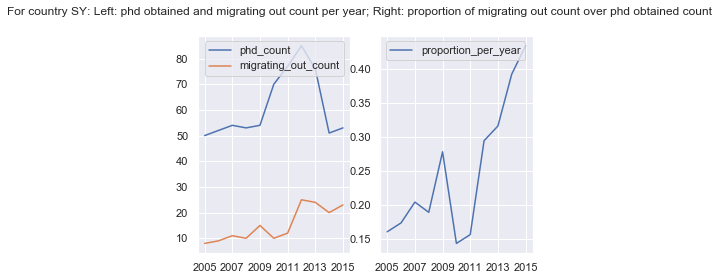


MV Maldives

IR Iran, Islamic Republic of


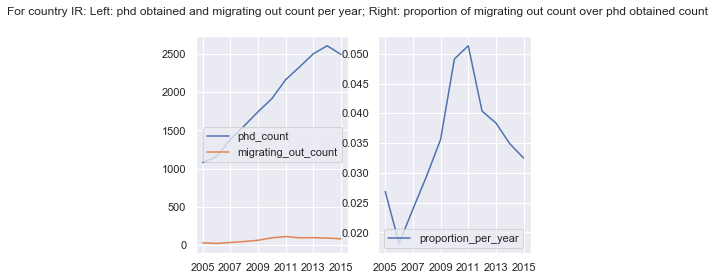


HU Hungary


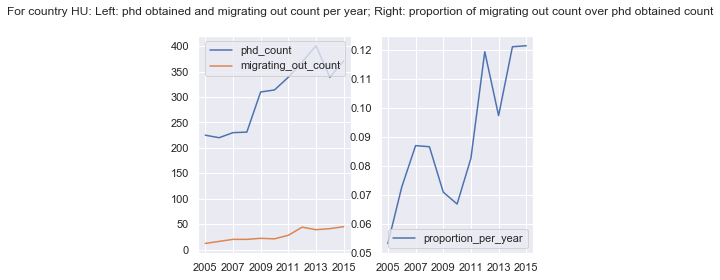


LV Latvia

PN Pitcairn

TK Tokelau


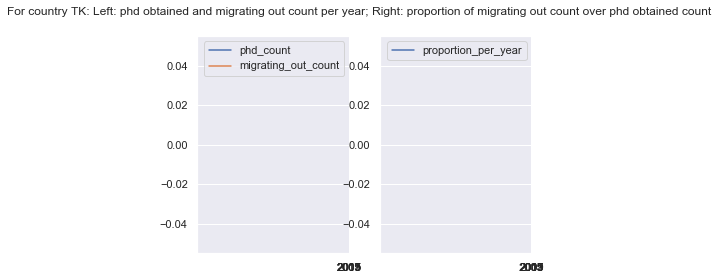


JM Jamaica

SZ Eswatini

BJ Benin

AT Austria


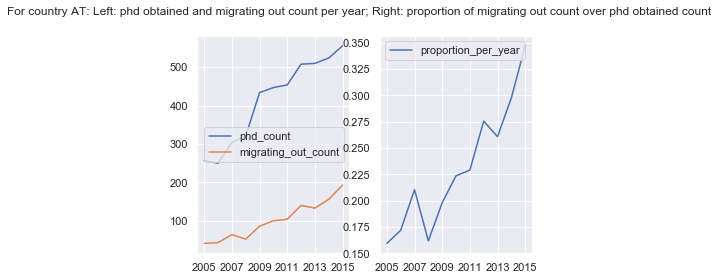


FM Micronesia, Federated States of


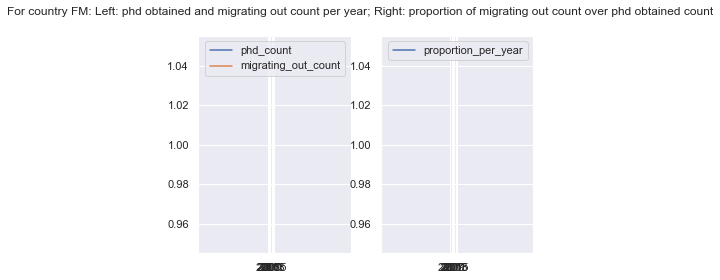


CR Costa Rica


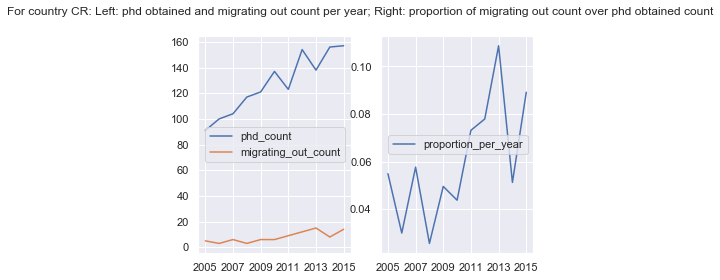


IQ Iraq


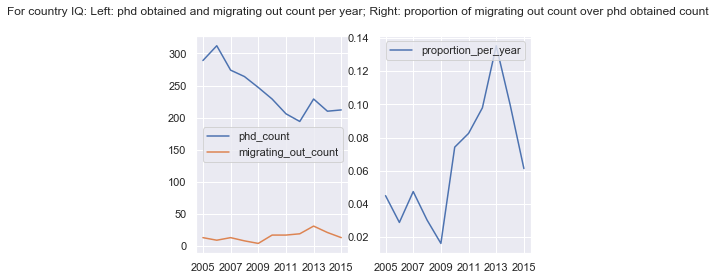


IN India


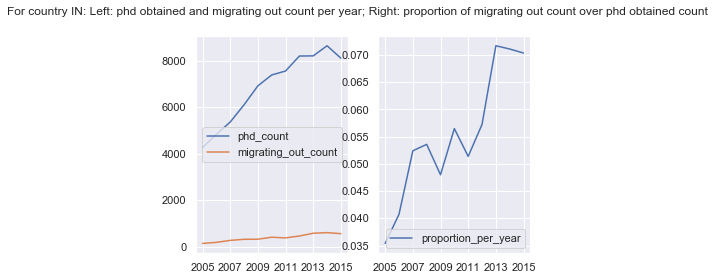


LC Saint Lucia

DK Denmark


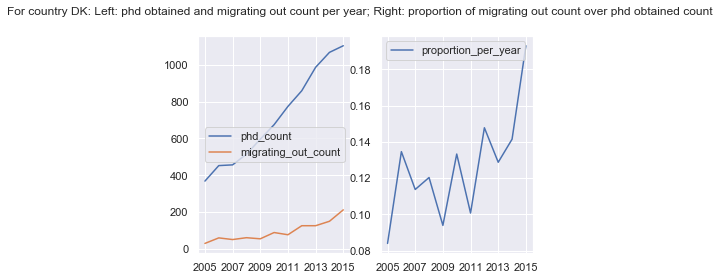


SE Sweden


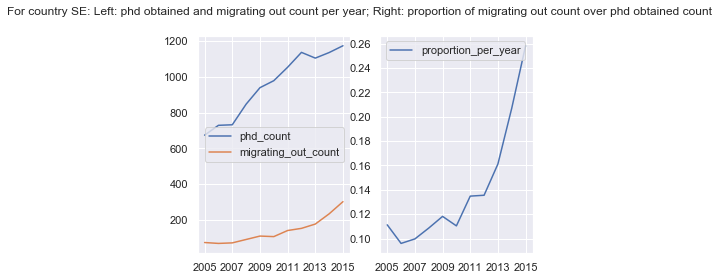


CM Cameroon


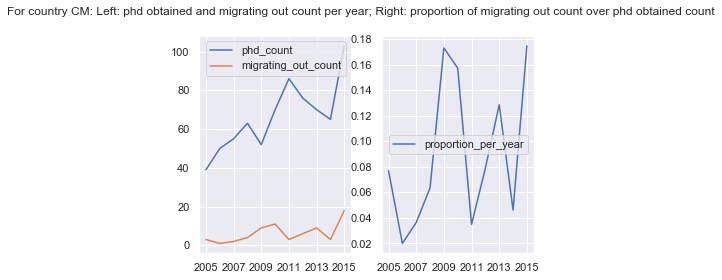


PH Philippines


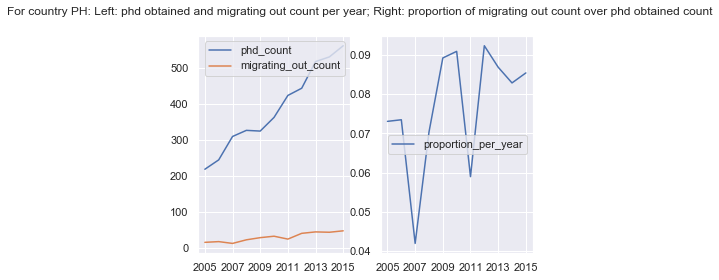


ID Indonesia


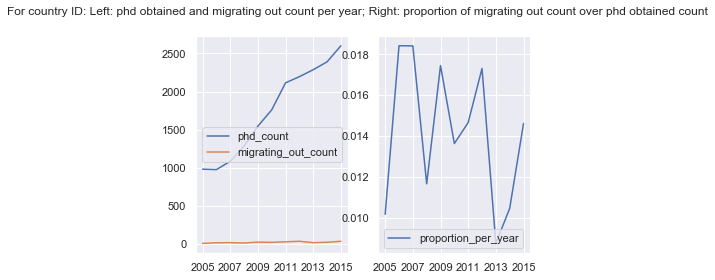


GN Guinea

VA Holy See

KP Korea, Democratic People's Republic of

ZM Zambia

PL Poland


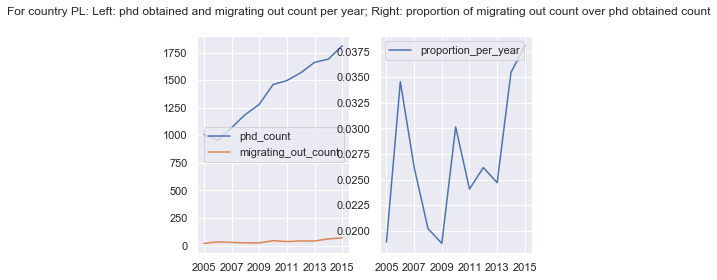


SD Sudan


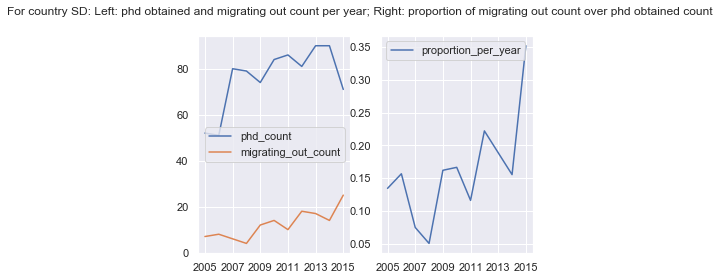


MY Malaysia


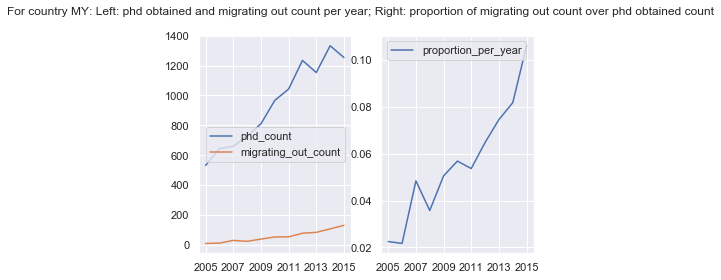


CY Cyprus


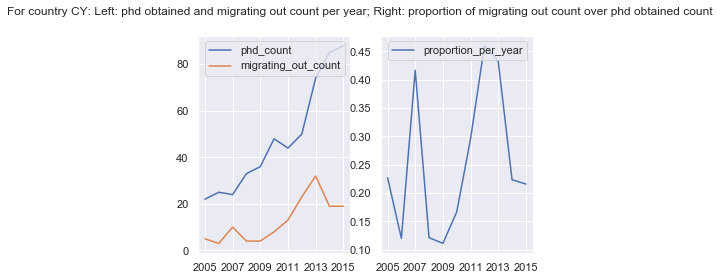


BI Burundi

GT Guatemala


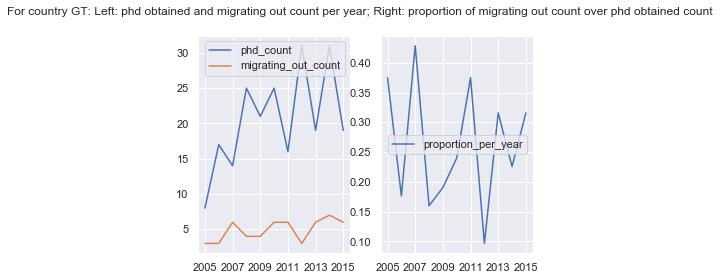


LU Luxembourg

XK Kosovo

EE Estonia

MC Monaco

ST Sao Tome and Principe

AX Åland Islands

BZ Belize

BS Bahamas

JP Japan


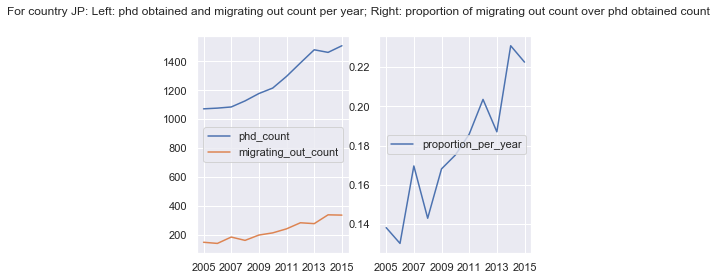


BV Bouvet Island

AO Angola


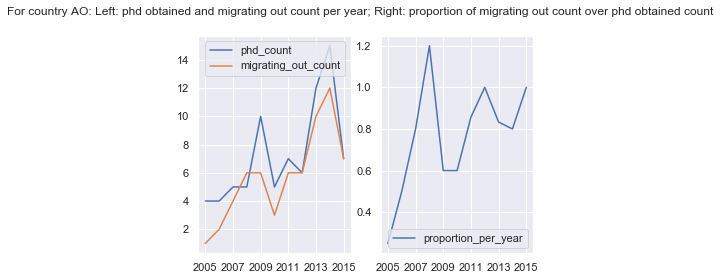


GG Guernsey

GU Guam

GM Gambia

TM Turkmenistan

LB Lebanon


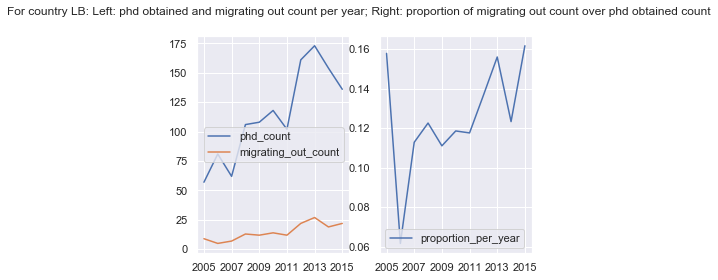


TJ Tajikistan

SS South Sudan

ET Ethiopia


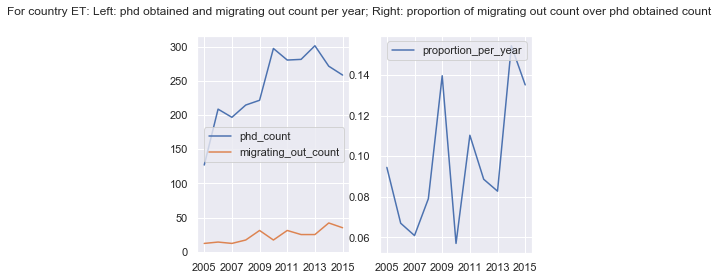


KH Cambodia


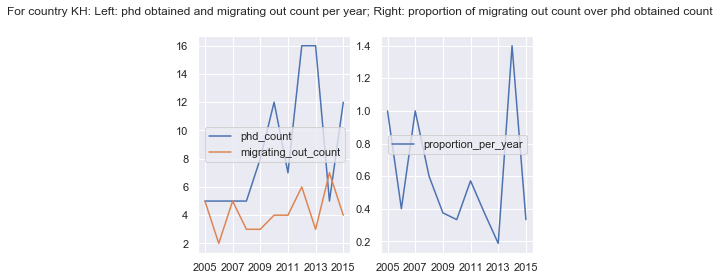


AD Andorra

MP Northern Mariana Islands

AZ Azerbaijan

ZA South Africa


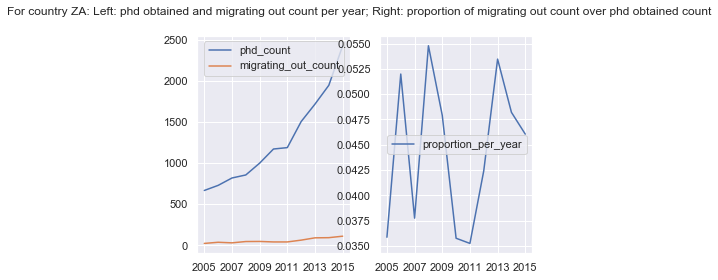


KR Korea, Republic of


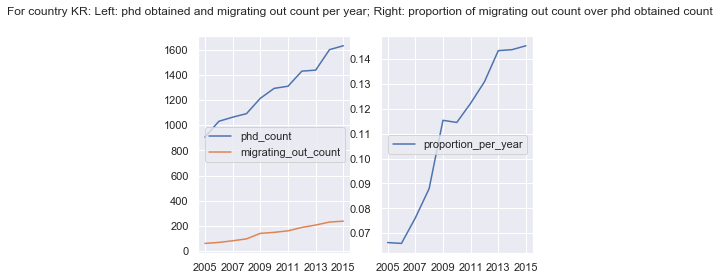


MZ Mozambique


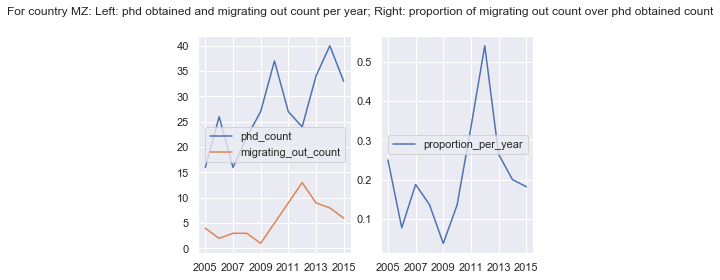


FR France


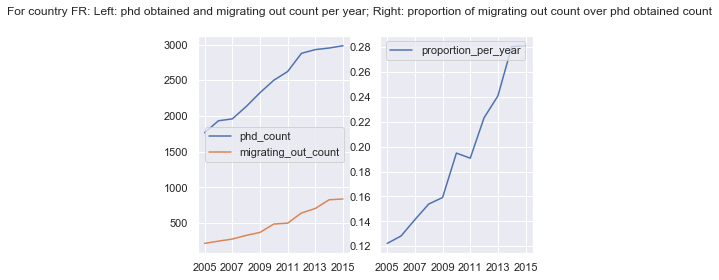


BQ Bonaire, Sint Eustatius and Saba

FK Falkland Islands (Malvinas)

MO Macao

SM San Marino

MX Mexico


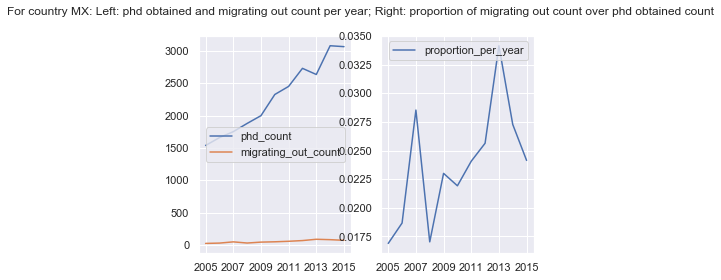


EG Egypt


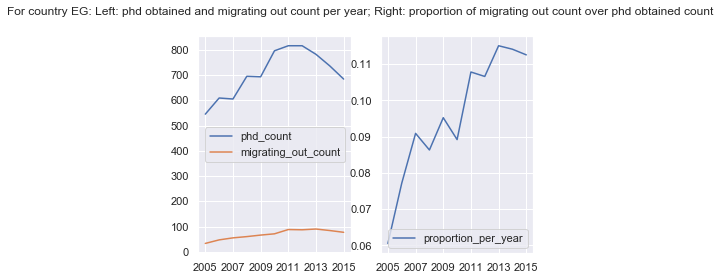


RW Rwanda


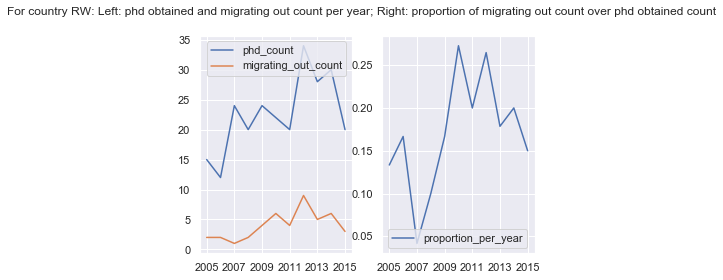


MG Madagascar

GH Ghana


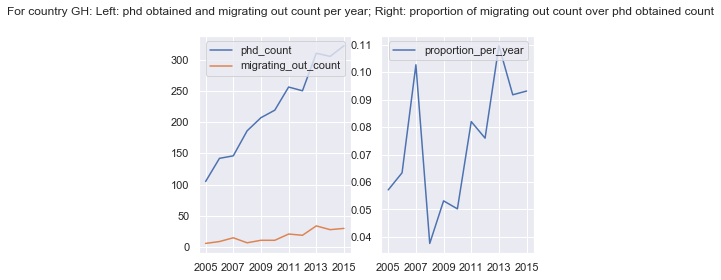


BW Botswana


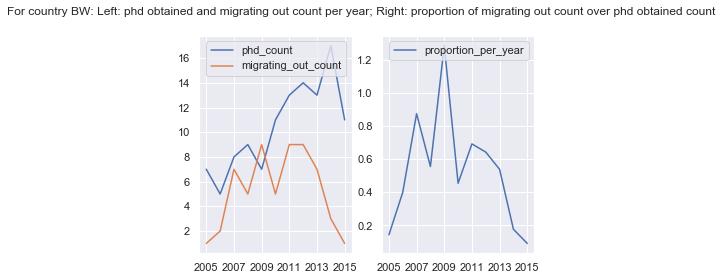


GE Georgia

YE Yemen


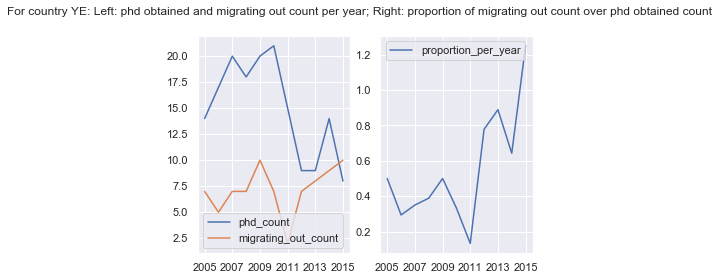


VC Saint Vincent and the Grenadines

BD Bangladesh


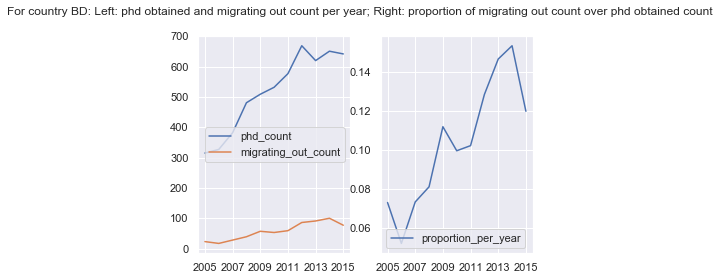


MW Malawi


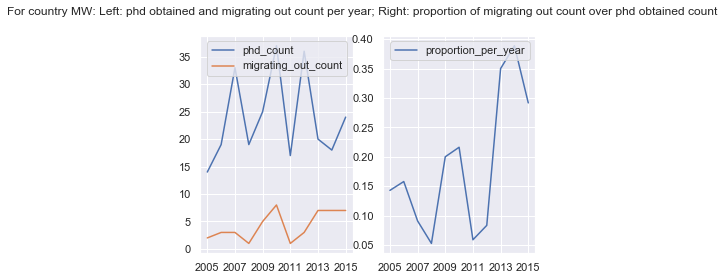


LA Lao People's Democratic Republic

CW Curaçao



In [53]:
from iso3166 import countries

for country_code in country_set:
    if type(country_code)==type("") and len(country_code)==2:
        print(country_code, countries.get(country_code).name)
        plot_proportion(df,df_migration_records,current_country=country_code)
        print()

### Afterthought

Could compare with existing migration research from here https://www.migrationpolicy.org/article/morocco-setting-stage-becoming-migration-transition-country

Xin's note to the team:

Hi 关于new-q2 gravity model 有一些结果了 想和大家汇报下~ google drive里我加了一个notebook pdf, 从第7页开始是一些折线图。https://drive.google.com/drive/u/0/folders/1_qgzktV9FohFqSVwkcWrrHNI57OYCjNN

折线图统计了每个国家逐年来看 获得PhD的绝对值 和 往外迁移的绝对值 以及两者之间的比值。现在这样计算 使用的分母是获得PhD的数量 粗略代替了原来讨论用的分母 即每个国家的本来人口数 (应该要用的数据) 。这样计算的好处是获得PhD的数量 比 人口数 更体现各国的培养科研人才的能力。坏处是往外迁移 有可能是不同科研职位间的迁移 而 不一定是获得PhD之后的那次迁移 所以这个比值没有太大的语义。

几点观察 

1. 大部分国家 往外迁移的比例 占 获得PhD 数量的 0.1 - 0.2 
2. Kuwait 科威特 和 Libya 利比亚 获得PhD 的数量极少 在十位个位数范围 往外迁移的比例大于1
2. Israel 以色列 往外迁移的比例逐年增速较大 
3. Hong Kong 香港 往外迁移的比例高于平均线较多

现在的问题是想听听大家的意见 还有什么形式的数据比较符合gravity model的初衷。

我看wikipedia是说分析两个地区之间人口数量以及物理距离远近对迁移数量的影响。这样的话 我可能会再做一些country pairwise的图表 比如 距离较远的大国和小国；距离较近的小国和小国。一共有6种类型 * migrating in/out 这么些情况吧。